In [24]:
import logging
import tempfile
import pandas as pd
import os

import numpy as np
import statsmodels.api as sm

import datetime
from matplotlib import pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import datetime, os, sys
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list

import gym
import numpy as np
import pandas as pd
from gym import spaces
from gym.utils import seeding
from sklearn.preprocessing import scale

pd.set_option('display.max_rows', 300) 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 10
%matplotlib inline

In [25]:
import tensorflow as tf

In [26]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

EPISODES = 300

In [27]:
path = 'data\stocks'
names = []
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

for f in files:
    names.append(f)
root = path

In [28]:
def read_csv_files(root):
    
    '''Loop through each csv file in directory and store them in a dictionary'''
    
    stock_dict = {}

    for file in os.listdir(root):
        if (file == 'sp500.csv') or (file == 'SPX.csv') :
            continue
        
        elif file.endswith(".txt"):
            name = os.path.splitext(file)[0]
            stock_dict[name] = pd.read_csv(os.path.join(root, file))
    
    return stock_dict

In [29]:
def build_tables_of_stocks(stock_dict):
    
    index_1, index_2, index_3, index_4, index_5 = [], [], [], [], []
    '''Constructs dataframes of daily closing prices, daily trading volumes, daily price returns and 
    daily log returns for each stock over the last 10 years'''
    count = 0

    df_price, df_volume, df_return, df_logret, df_marketcap = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for file in stock_dict:
        try:
            if ('RUB' not in str(file)):
                pass
            else:
                count += 1
                df = pd.DataFrame(stock_dict[file]).copy()
                #header = df.iloc[0]
                #df = df[1:]
                #df.rename(columns=header, inplace=True)
                #df = df[1:]
                #df.reset_index(drop=True, inplace=True)

                name_price = str(file).split('_')[0] + ' closing price'
                name_volume = str(file).split('_')[0] + ' volume'
                name_return = str(file).split('_')[0] + ' price return'
                name_logret = str(file).split('_')[0] + ' log return'
                name_marketcap = str(file).split('_')[0] + ' market cap'

                #df.iloc[:,1:] = df.iloc[:,1:].astype(float)
                #print(df.columns)
                df[name_marketcap] = df['c'] * df['v']
                df[name_return] = df['c']/df['c'].shift()-1
                df[name_return] = df[name_return].astype(float)
                df[name_logret] = np.log(df[name_return]+1)
                df[name_return].fillna(0, inplace=True)
                df[name_logret].fillna(0, inplace=True)

                df = df.rename(columns={'time': 'date', 'c': name_price, 'v': name_volume})
                #df.date = pd.to_datetime(df.date)
                df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00'))
               # return df
                #df.drop(columns=['o', 'Unnamed: 0', 'h', 'l', 'interval'], inplace=True)

                df.set_index('date', inplace=True)
                #df.iloc[:,:] = df.iloc[:,:].astype(float)
                if count == 1:
                    df_price[name_price.split(' ')[0]] = df[name_price]
                    df_volume[name_volume.split(' ')[0]] = df[name_volume]
                    df_return[name_return.split(' ')[0]] = df[name_return]
                    df_logret[name_logret.split(' ')[0]] = df[name_logret]
                    df_marketcap[name_marketcap.split(' ')[0]] = df[name_marketcap]
                else:
                    df_price = pd.concat([df_price, df[name_price]], ignore_index=True, axis=1)
                    df_volume = pd.concat([df_volume, df[name_volume]], ignore_index=True, axis=1)
                    df_return = pd.concat([df_return, df[name_return]], ignore_index=True, axis=1)
                    df_logret = pd.concat([df_logret, df[name_logret]], ignore_index=True, axis=1)
                    df_marketcap = pd.concat([df_marketcap, df[name_marketcap]], ignore_index=True, axis=1)
                index_1.append(name_price.split(' ')[0])
                index_2.append(name_volume.split(' ')[0])
                index_3.append(name_return.split(' ')[0])
                index_4.append(name_logret.split(' ')[0])
                index_5.append(name_marketcap.split(' ')[0])
        except:
            pass

    df_price.columns = index_1
    df_volume.columns = index_2
    df_return.columns = index_3
    df_logret.columns = index_4
    df_marketcap.columns = index_5

    df_price  =  df_price.loc[df_price.index >= datetime.datetime(2010, 1, 11, 7, 0, 0, 0)]
    df_volume = df_volume.loc[df_volume.index >= datetime.datetime(2010, 1, 11, 7, 0, 0, 0)]
    df_return = df_return.loc[df_return.index >= datetime.datetime(2010, 1, 11, 7, 0, 0, 0)]
    df_logret = df_logret.loc[df_logret.index >= datetime.datetime(2010, 1, 11, 7, 0, 0, 0)]
    df_marketcap = df_marketcap.loc[df_marketcap.index >= datetime.datetime(2010, 1, 11, 7, 0, 0, 0)]
    return df_price, df_volume, df_return, df_logret, df_marketcap

# Implementation # 
#closing_price, trading_volume, price_return, log_return, market_cap = build_tables_of_stocks(stock_dict)



def get_stock_tables():
    stock_dict = read_csv_files(root)
    closing_price, trading_volume, price_return, log_return, market_cap = build_tables_of_stocks(stock_dict)
    
    return closing_price, trading_volume, price_return, log_return, market_cap

closing_price, trading_volume, price_return, log_return, market_cap = get_stock_tables()

In [32]:
closing_price.index[-1]

Timestamp('2020-09-11 07:00:00')

In [75]:
import networkx as nx

correlation_method = 'spearman'

def create_network(data):
    
    """
    The data of log-returns passed to the function is used to calculate the correlation matrix.
    The method of calculation is based on the 'correlation_method' defined above.
    
    When the correlation matrix is constructed, it is converted to the distance matrix using the formula: np.sqrt(2*(1-test_corr_matrix))
    
    The distance matrix is used to construct the network of stocks which is further modified by 
    the Minimimum Spanning Tree algorithm to eliminate redundunt network connections (edges) (the method is based on
    minimizing the cost of travelling from one node to another, so redundant edges are those that the costly to travel compared to other)
    
    In our case, it means we filter out NOT the weak correlations but those correlations (edges) that take longer time to "travel" (impact) from
    one stock to another.
    ""
    """
    corr_matrix = data.corr(method=correlation_method).fillna(0)
    test_corr_matrix = corr_matrix#test.corr(method=correlation_method)

    test_dist_matrix = np.sqrt(2*(1-test_corr_matrix))

    test_dist_array = np.array(test_dist_matrix)
    test_dist_array_upper = np.triu(test_dist_array, k=1)
    G = nx.from_numpy_matrix(test_dist_array_upper) 
    labels = test_corr_matrix.columns.values
    G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))
    
    T = nx.minimum_spanning_tree(G)
        
   
    return G, T

In [76]:
def draw_network(network):
    plt.figure(figsize = (20, 15))
    edges,weights = zip(*nx.get_edge_attributes(network,'weight').items())
    d = dict(network.degree)
    nx.draw(network,edgelist=edges, edge_color=weights, font_size = 15, font_color = 'r', with_labels=True,edge_cmap=plt.cm.Greens, width=7,node_size=[v * 100 for v in d.values()], node_color = 'b')
    plt.show()

In [77]:
def rd(close_price, window):
    """
    Trading day criterion:
    decr

    """
    close = close_price
    rets = np.log(close/close.shift(1)).fillna(0)
    t = rets >= 0
    res = t.rolling(window = window).sum()/t.rolling(window = window).count()
    return res.fillna(0)

def rf(close_price, window):
    close = close_price
    rets = np.log(close/close.shift(1)).fillna(0)
    t = rets >= 0
    res = (rets*t).rolling(window = window).sum()/abs(rets).rolling(window = window).sum()
    return res.fillna(0)

In [80]:
## Global params

window = 20

trading_days = 252

ticker = 'VSMO'

### Data analysis

# Section 1: Returns analysis

## Preface

Эта часть будет на русском, т.к. так было проще и быстрее. Сам основной текст разумеется на английском 

Наш анализ будет разделен на три составляющих:

1) Анализ доходностей акции

2) Анализ характеристики сети акций, построенной на основе корреляций ретернов с остальными акциями из выборки

3) Комбинирование переменных (фичей), найденных в 1) и 2) и поиск "подходящих", которые мы определим как переменные значимо определяющие доходность $logP_{t} - logP_{t-1}$

#### Methodology

Мы начнем с фильтрации обычных ретернов, затем фильтрацией "суммы".

После этого мы проанализируем два показателя, базирующихся на свойствах (топологии) сети акций.

В конце секции мы проведем небольшой анализ "глобальных" (в сравнении с другими акциями) свойств корреляции акции. Здесь, мы выдывигаем следующие гипотезы:

Сильно обобщая, скажем, что у акции есть
три состояния на промежутке времени больше 1 дня - она явно растет, ходит бочком или явно падает. Акция может явно падать или расти по двум
основным причинам: а) собственная причина (что-то связанное конкретно
с компанией, или конкретно с рынком этой акции, спекулянты) и/или б)
причина глобальная (кризис, пятница, настроения). Если рост происходит
по последней причине, то мы должны будем заметить изменения в корреляциях с другими акциями.
Описав корреляции как граф и отфильтровав его, мы можем воспользоваться методами SNA для анализа интерпретации сети акций и для нахождения латентных сигналов (метрики на основе топологии сети) 



Мы начнем с анализа доходностей

In [11]:
window = 20

In [94]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import xgboost as xgb
seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [12]:
prices = closing_price

rets = np.log(prices/prices.shift(1)).fillna(0)

In [16]:
rets['VSMO']

2010-01-11 07:00:00    0.000000
2010-01-12 07:00:00   -0.014038
2010-01-13 07:00:00    0.010150
2010-01-14 07:00:00    0.160764
2010-01-15 07:00:00   -0.028963
                         ...   
2020-09-07 07:00:00    0.009101
2020-09-08 07:00:00   -0.015982
2020-09-09 07:00:00    0.001150
2020-09-10 07:00:00   -0.013889
2020-09-11 07:00:00    0.012739
Name: VSMO, Length: 2775, dtype: float64

In [13]:
train_num = 2000
#RL_period = 875
val_set = 0

In [174]:
prices = closing_price[ticker][:]

rets = np.log(prices/prices.shift(1)).fillna(0)
sum_rets = rets.fillna(0).rolling(window = window).sum().fillna(0)[window:]

In [175]:
start_from = max(1, window)

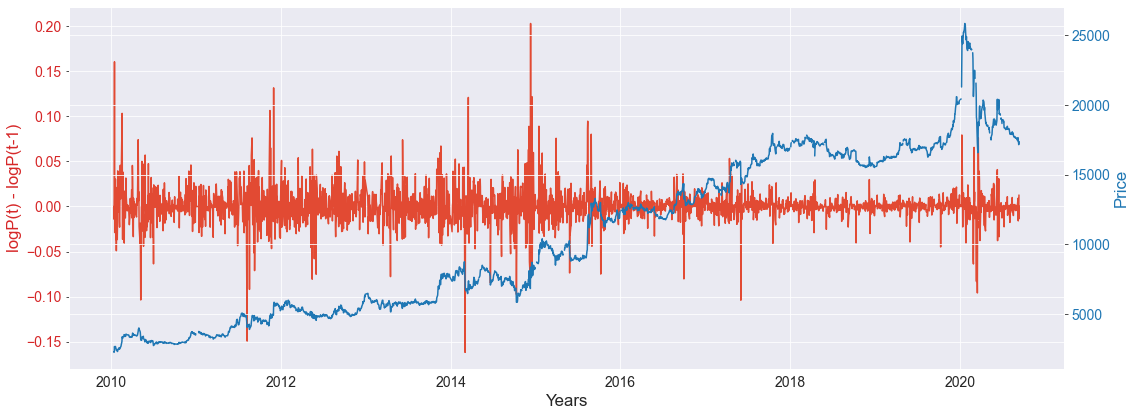

In [176]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(rets)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Price', color=color) 
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


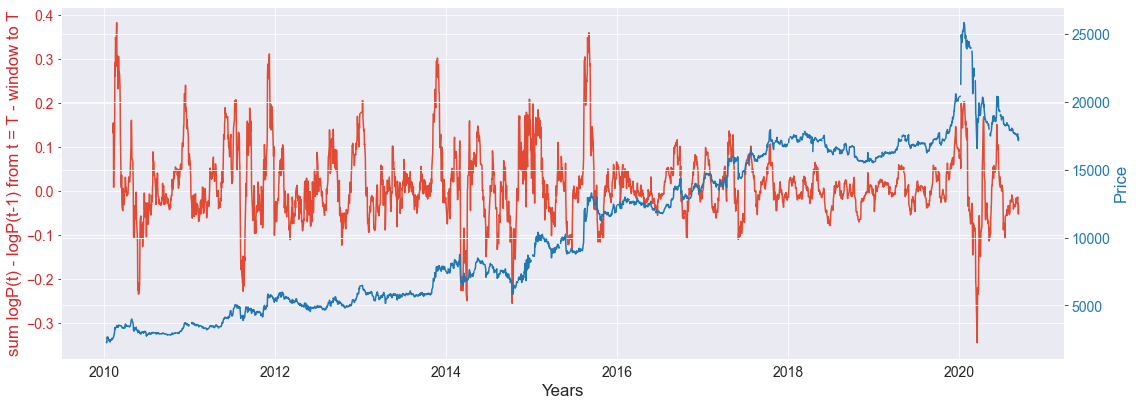

In [177]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('sum logP(t) - logP(t-1) from t = T - window to T', color=color)
ax1.plot(sum_rets)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Price', color=color) 
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


Фильтруем оба ряда

In [178]:
import arch.data.core_cpi
from arch.univariate import ARX, arch_model
from arch.univariate import ARCH, GARCH, EGARCH

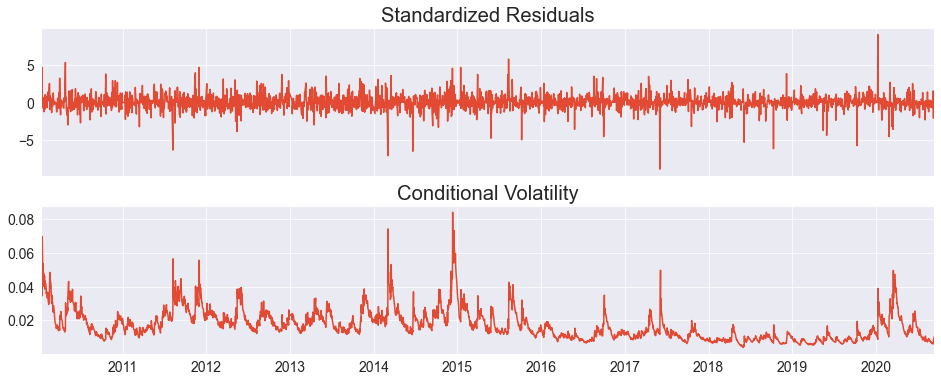

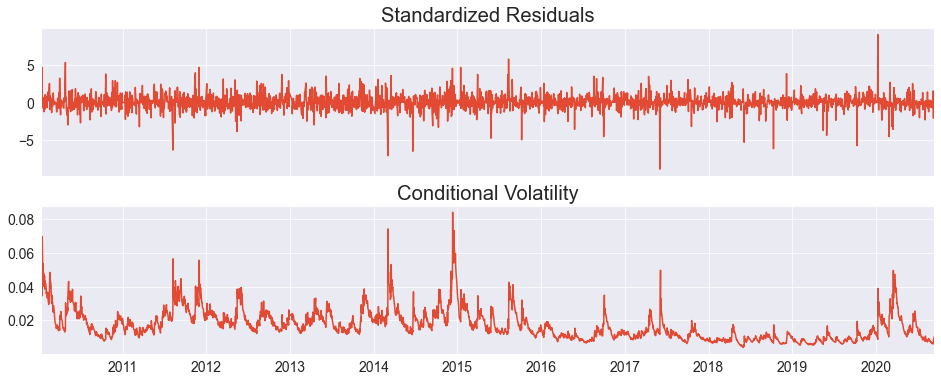

In [180]:
res1.plot()

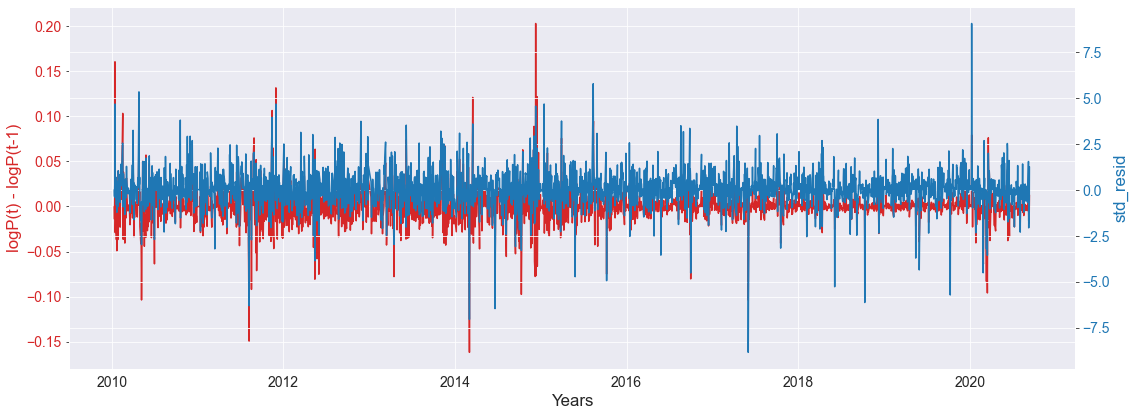

In [181]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(rets, c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('std_resid', color=color) 
ax2.plot(res1.std_resid,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


In [183]:
start_from = start_from + lag

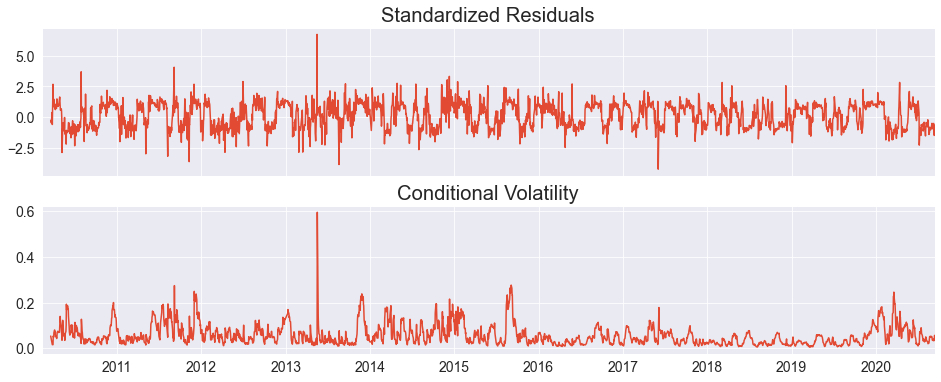

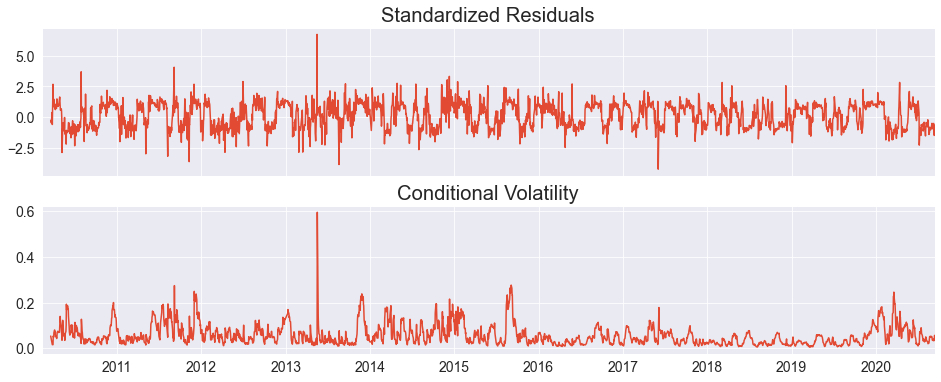

In [184]:
res2.plot()

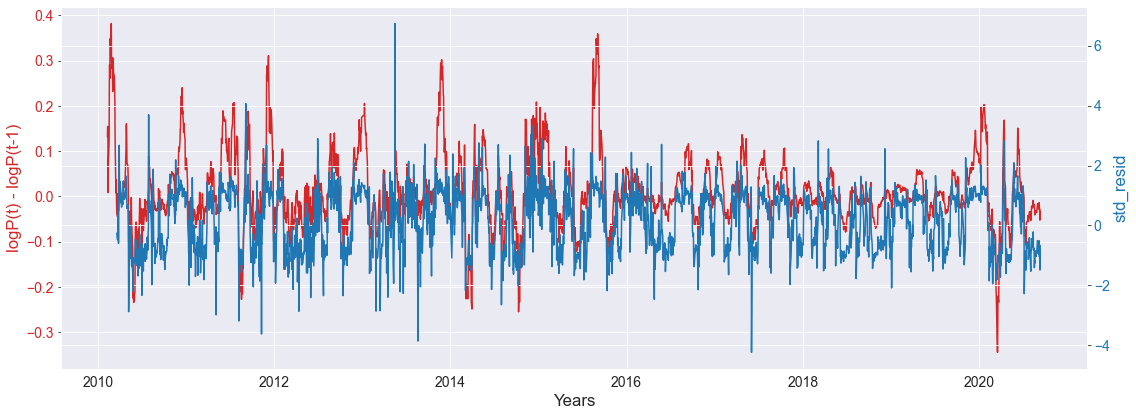

In [185]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(sum_rets, c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('std_resid', color=color) 
ax2.plot((res2.std_resid),color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


### Пожалуйста, просмотрите сначала секцию 2 (она сразу после секции 3). 

Да, извините, что порядок перепутался, но просто графики в секции 3 сохранились, а когда я начал перемещать эту секцию вниз, XGBoost выдал ошибку и не стал строить графики (вероятно из-за библиотеки которую я подключил в самом конце работы)

# Section 3: Modelling

In [32]:
del net['Unnamed: 0']

In [383]:
res1_ = res1.resid
res2_ = res2.resid

table = pd.DataFrame([res1_, res2_]).T[start_from:]
table.columns = ['R_t', 'sum_Rt']

In [384]:
table = pd.concat([table, aux_data], axis = 1).dropna()

In [385]:
table['R_t'] = table['R_t'].shift(-1)
table = table[:-1]
X = table[['sum_Rt', 'close', 'degree', 'flow']] #'res1',  #, 
y = table[['R_t']]


In [386]:
table['close'] = table['close'].rolling(window = 20).sum()
table['degree'] = table['degree'].rolling(window = window).sum()
table['flow'] = table['flow'].rolling(window = 20).sum()

In [387]:
table.dropna(inplace = True)

In [388]:
train_num = 1500

In [389]:


X_train, y_train = X.iloc[:train_num], y.iloc[:train_num]
X_test, y_test = X.iloc[train_num:], y.iloc[train_num:]


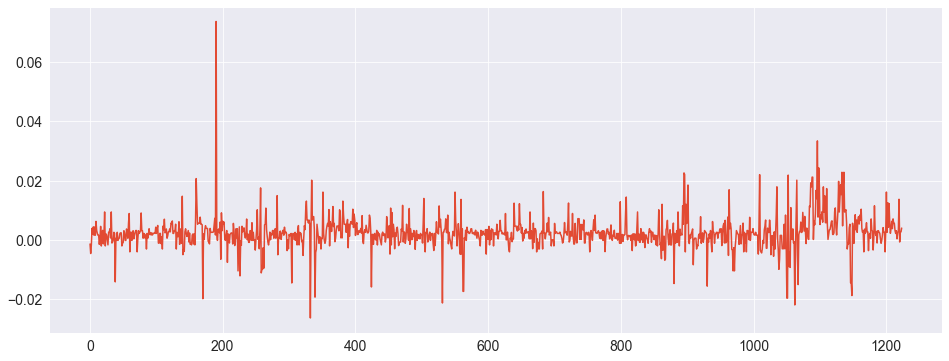

In [390]:

reg = xgb.XGBRegressor(n_estimators=1500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False,
       ) # Change verbose to True if you want to see it train


plt.plot(reg.predict(X_test))

In [391]:
reg.feature_importances_

array([0.28250915, 0.2648642 , 0.25695345, 0.19567311], dtype=float32)

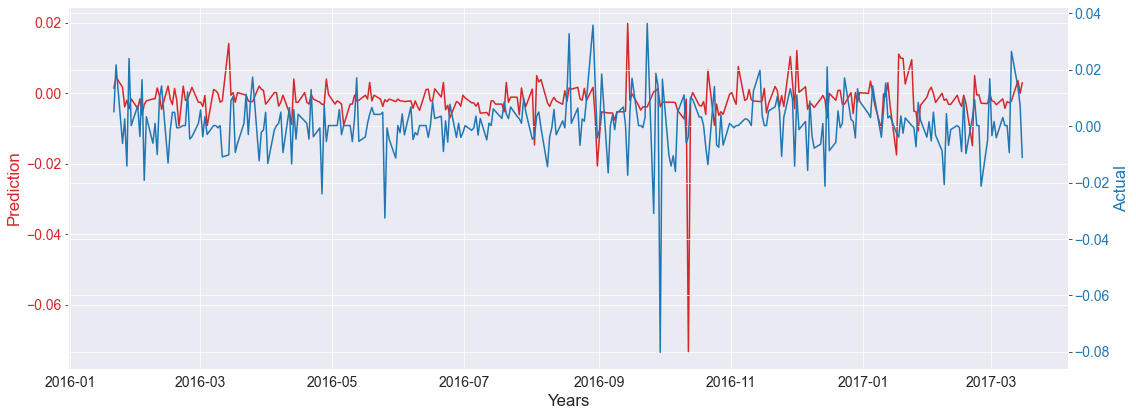

In [409]:
#plt.plot(sum_rets)
Y_predicted = pd.Series(reg.predict(X_test))
Y_predicted.index = y_test.index
t = 300
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Prediction', color=color)
ax1.plot(-Y_predicted[0:t], c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Actual', color=color) 
ax2.plot(y_test[0:t],color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()


In [418]:
Y_predicted.rolling(window = 20).std()[20:]

2016-02-18 07:00:00    0.002694
2016-02-19 07:00:00    0.002270
2016-02-20 07:00:00    0.002669
2016-02-22 07:00:00    0.002826
2016-02-23 07:00:00    0.002826
                         ...   
2020-09-04 07:00:00    0.004402
2020-09-07 07:00:00    0.003903
2020-09-08 07:00:00    0.003898
2020-09-09 07:00:00    0.003488
2020-09-10 07:00:00    0.003489
Length: 1204, dtype: float64

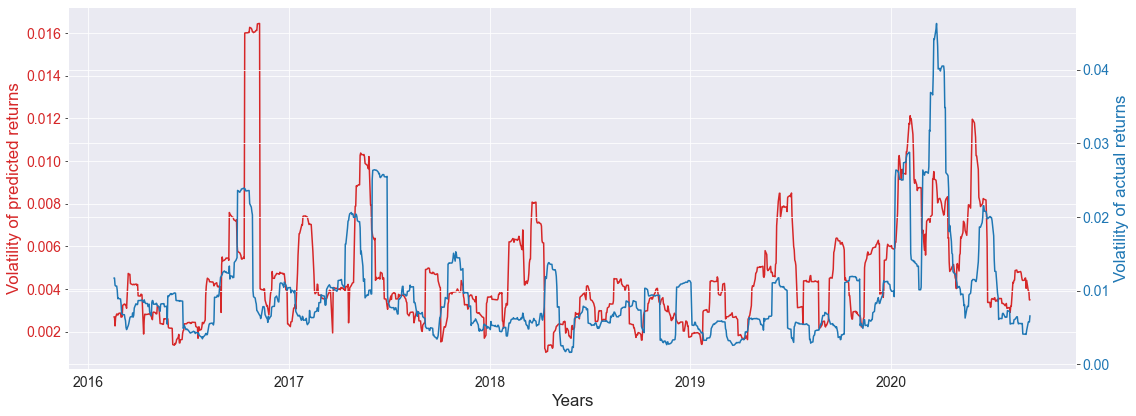

In [503]:
#plt.plot(sum_rets)
Y_predicted = pd.Series(reg.predict(X_test))
Y_predicted.index = y_test.index
t = 300
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Volatility of predicted returns', color=color)
ax1.plot(Y_predicted.rolling(window = 20).std(), c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Volatility of actual returns', color=color) 
ax2.plot(y_test.rolling(window = 20).std(),color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()


It is quite intereseting to notice that volatility of our predictions outrun (in terms of timing) the actual returns volatility. That is, the volatility level of our predicted returns starts to increase earlier than volatility of our actual returns.

It is a significant feature of our data and can be applied to volatility forecasting and options pricing. Or, if being precise, it allows to better find the timing of when we can expect higher volatility levels.

In other words, I $\textbf{hypothesize}$ that we found *a leading indicator* of returns volatility.


#### Feature verification

To understand wether our features are good at forecasting the the residuals to the feature importance induced by the boosting algorithm (this is backed by the properties of trees, where for each feature a special score is calculated)

In [423]:
reg.feature_importances_

array([0.28250915, 0.2648642 , 0.25695345, 0.19567311], dtype=float32)

It does appear that all the features are relatively important (there is no features that take very high percentage, they all are releatively uniformly distributed (percentages))

However, taking a close look at the graph we can observe that in come 

In [426]:
dataRL = pd.concat([rets, -Y_predicted, X_test], axis = 1).dropna()
dataRL.columns = ['actual_ret', 'resid_predicted', 'sum_Rt', 'close', 'degree', 'flow']

# Section 2: Network characteristics analysis

In [283]:
t_last = 0

In [83]:
#def calculate_network_chars(window, t_last = 0, *args):
indx = []
networks = []
dates = []
for t in range(t_last, 2775):
    try:
        dt = window
        G, T = create_network(closing_price[t:t+dt])
        indx.append(t+dt)
        dates.append(closing_price.index[t+dt])
        networks.append(T)
    except KeyboardInterrupt:
        t_last = t
        print(t_last)
        break
        sys.exit()
    except Exception as e:
        t_last = t
        print(e)
        pass



1127


In [70]:
closeness_centrality = [nx.closeness_centrality(T)[ticker] for T in networks] ## хорошая идея
closeness_centrality = pd.Series(closeness_centrality) 
closeness_centrality.index = price_return.index[indx[0]:]

degree_centrality = [nx.degree_centrality(T)[ticker] for T in networks] ## тоже хорошая идея
degree_centrality = pd.Series(degree_centrality) 
degree_centrality.index = price_return.index[indx[0]:]
#current_flow_betweenness_centrality = [nx.current_flow_betweenness_centrality(T)[ticker] for T in networks]

<ipython-input-70-f02ccc9dc477>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  closeness_centrality = pd.Series(closeness_centrality)


IndexError: list index out of range

In [71]:
current_flow_betweenness_centrality = [nx.current_flow_betweenness_centrality(T)[ticker] for T in networks]
current_flow_betweenness_centrality = pd.Series(current_flow_betweenness_centrality) 
current_flow_betweenness_centrality.index = price_return.index[indx[0]:]

<ipython-input-71-d07928650f68>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  current_flow_betweenness_centrality = pd.Series(current_flow_betweenness_centrality)


IndexError: list index out of range

In [58]:
aux_data = pd.DataFrame([closeness_centrality, degree_centrality, current_flow_betweenness_centrality, dates]).T
aux_data.columns = ['close', 'degree', 'flow', 'dates']

In [39]:
aux_data.to_csv('aux_data.txt')

In [84]:
net = pd.read_csv('aux_data.txt')

In [88]:
net['Unnamed: 0'] = net['Unnamed: 0'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [89]:
net.index = net['Unnamed: 0']

In [91]:
del net['Unnamed: 0']

In [135]:
closeness_centrality = net['close']
degree_centrality = net['degree']
current_flow_betweenness_centrality = net['flow']

#### Data Analysis

Здесь мы следуем методологии статьи https://arxiv.org/pdf/1608.03058.pdf


Мы посчитали матрицу корреляций используя непараметрическую корреляцию Спирмана (в статье линейная Пирсона).

После этого, матрица была переведена в матрицу расстояний по формуле $d(i, j) = \sqrt{2(1-\rho(i, j)}$

Далее матрица расстояний используется для построения взвешенного графа (этим всем занимается функция *create_network()*)


Описание, которое я делал на английском для функции create_network()

"""

    The data of log-returns passed to the function is used to calculate the correlation matrix.
    The method of calculation is based on the 'correlation_method' defined above.
    
    When the correlation matrix is constructed, it is converted to the distance matrix using the formula: np.sqrt(2*(1-test_corr_matrix))
    
    The distance matrix is used to construct the network of stocks which is further modified by 
    the Minimimum Spanning Tree algorithm to eliminate redundunt network connections (edges) (the method is based on
    minimizing the cost of travelling from one node to another, so redundant edges are those that the costly to travel compared to other)
    
    In our case, it means we filter out NOT the weak correlations but those correlations (edges) that take longer time to "travel" from one stock to another (or in other words, impact).
    ""
    
 По собственной методологии, мы будем считать матрицу корреляций и, соотвественно, строить сеть(граф) со скользящим окном в 30 дней. Так мы можем лучше уловить меняющуюся структуру корреляций.

Пример MST графа россйиских акций за последний месяц (начиная от 17 сентября).  чем слабее оттенок зеленого на ребре графа, тем "ближе" акции к друг другу в плане корреляции. Соотвественно, чем темнее зеленый - тем более "отдалены" акции в плане корреляции

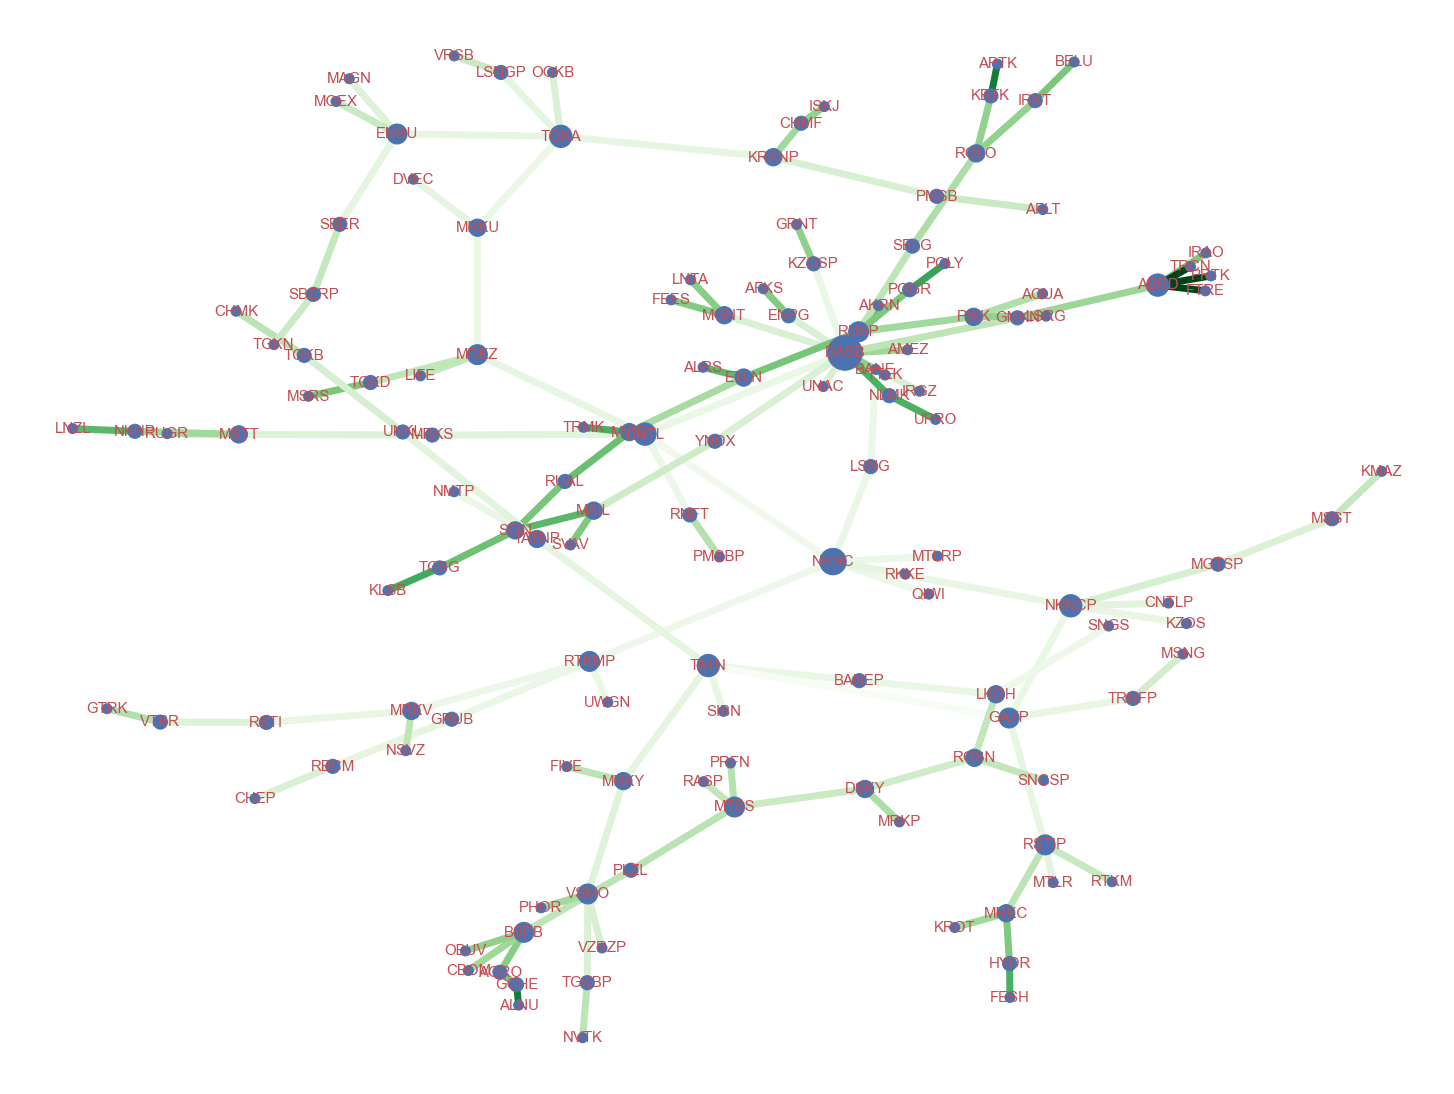

In [1221]:
draw_network(networks[-1])

##### Для сравнения, так выглядит граф до MST. Визуально информации особо не видно, колличественно, на самом деле, тоже. Поэтому, MST действительно помогает лучше "отфильтровать" сеть

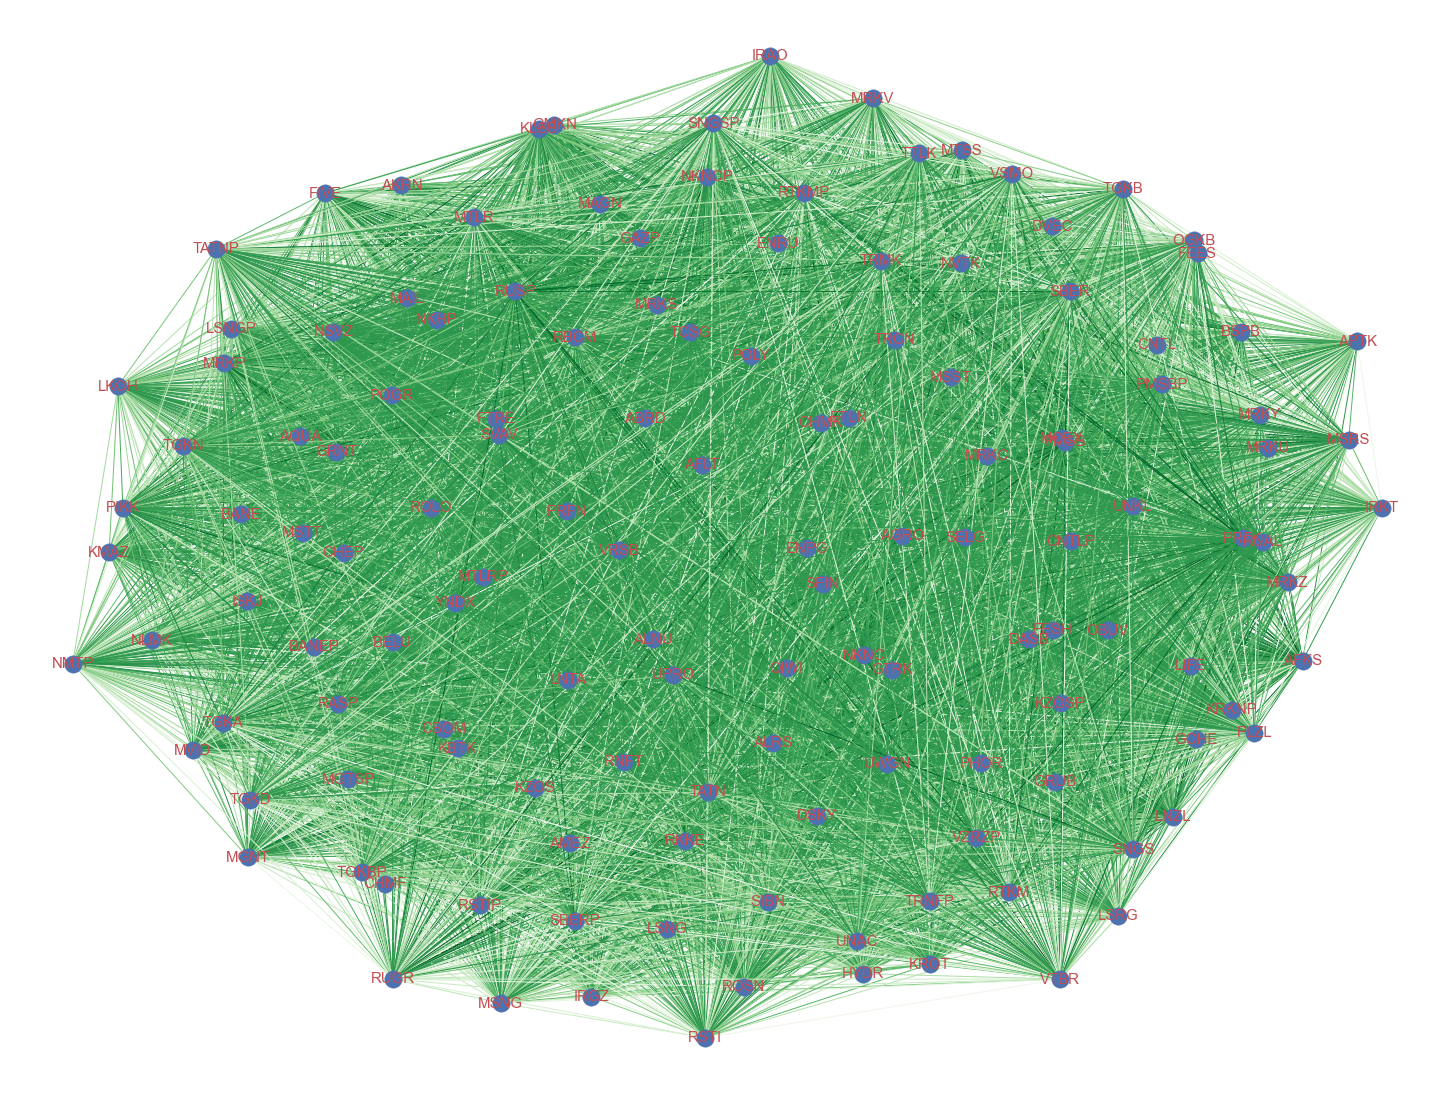

In [1247]:
G_ = create_network(closing_price[t:t+dt])[0]

plt.figure(figsize = (20, 15))
edges,weights = zip(*nx.get_edge_attributes(G_,'weight').items())
d = dict(G_.degree)
nx.draw(G_,edgelist=edges, edge_color=weights, font_size = 15, font_color = 'r', with_labels=True,edge_cmap=plt.cm.Greens, width=1, node_color = 'b')
plt.show()

Теперь рассмотрим MST network российских акций в период корона-кризиса:

In [1222]:
dates[-120]

Timestamp('2020-03-30 07:00:00')

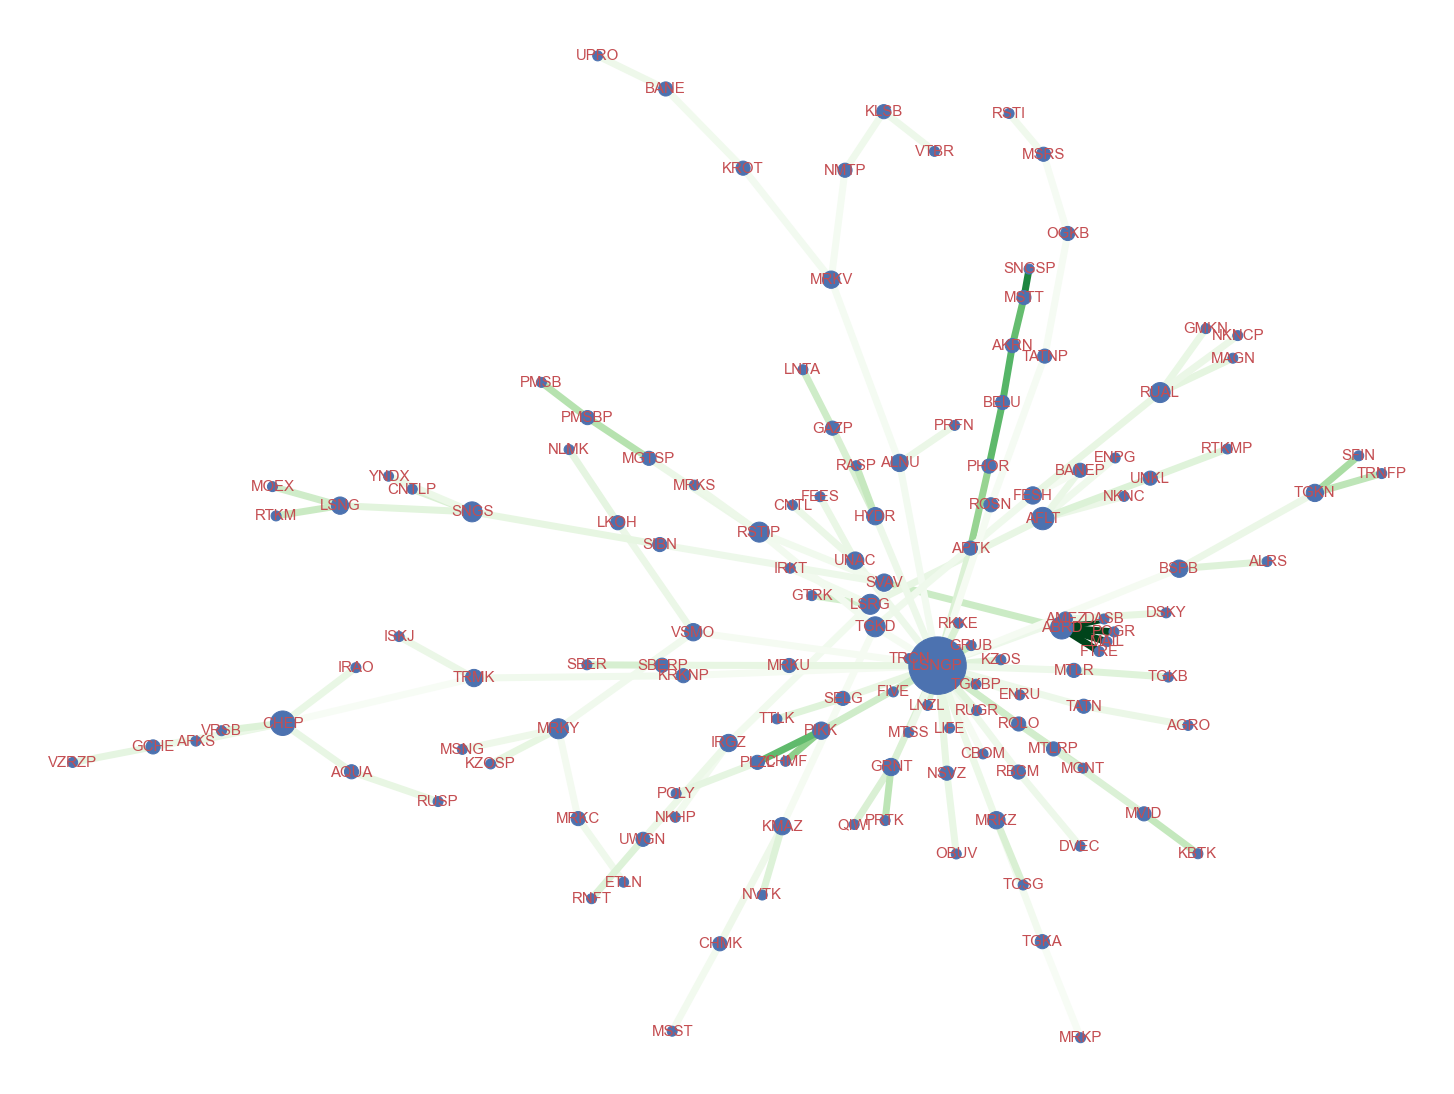

In [1223]:
draw_network(networks[-120]) 

Заметно, что в среднем веса ребер (то есть насколько оттенок зеленого ярко выражен) стали меньше. Иначе говоря, "расстояния", которые мы считали по формуле выше, стали меньше. Компании стали больше коррелировать между собой в момент кризиса, что довольно логично

Возвращаясь к гипотезе про корреляцию и основываясь на интуиции про изменения корреляций, мы выберем 3 показателя, которые могут отследить изменения расстояния вершины $v$ относительно своих соседней, центральность этой вершины (со сколькими она соединятся вместе)

In [173]:
aux_data = net

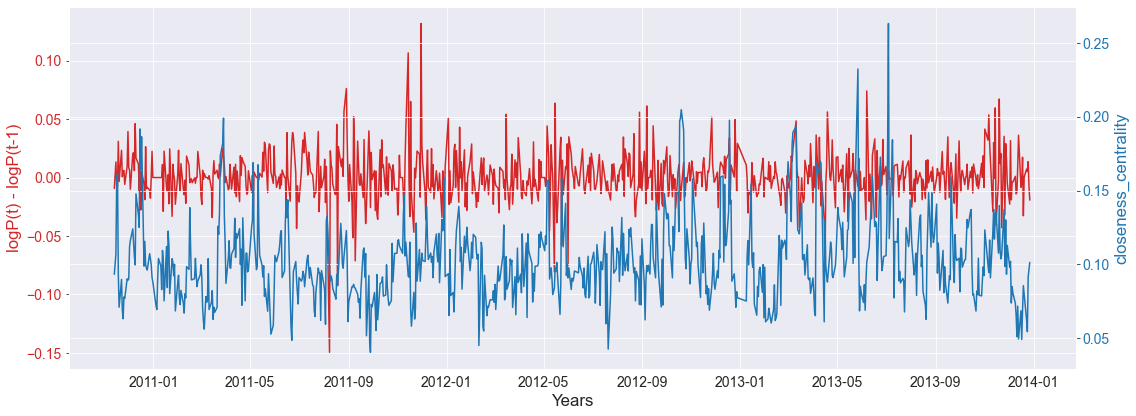

In [510]:
#plt.plot(sum_rets)

x, y = 200, 1000
fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(_['rets'][x:y], c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('closeness_centrality', color=color) 
ax2.plot(
    _['CC'][x:y], #.rolling(window = 30).sum() * _['CFC'].rolling(window = 20).sum())
    
    color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


In [ ]:
#plt.plot(sum_rets)

x, y = 210, 400
fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(_['rets'].rolling(window = 20).sum()[x:y], c = 'green')
ax1.plot(_['rets'][x:y], c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('closeness_centrality', color=color) 
ax2.plot(_['CC'][x:y],color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


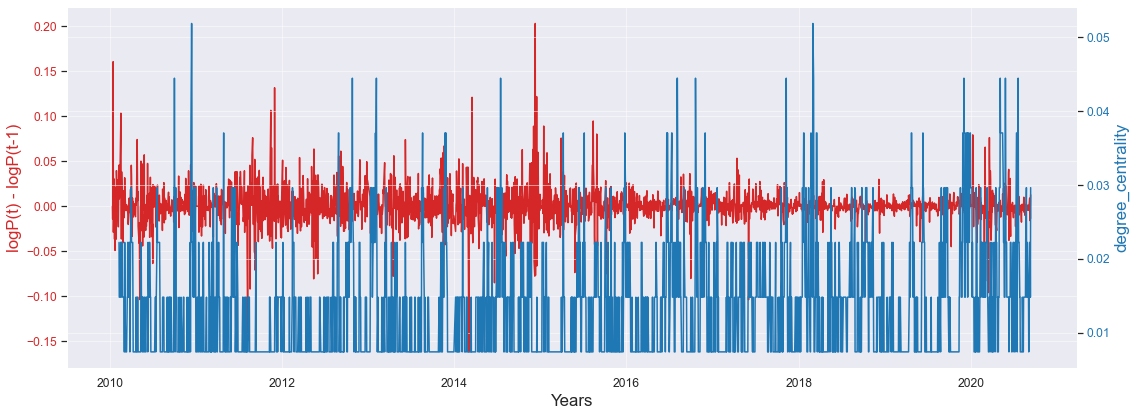

In [1228]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(rets, c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('degree_centrality', color=color) 
ax2.plot(degree_centrality,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


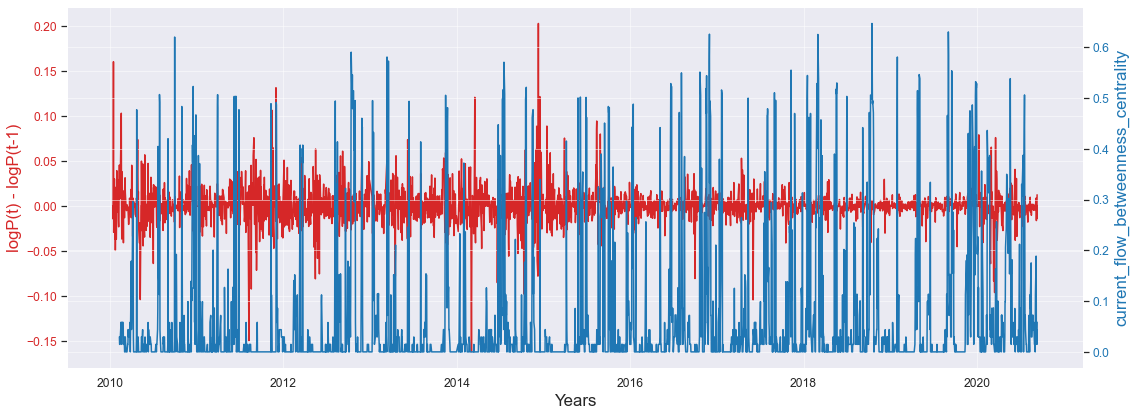

In [1230]:
#plt.plot(sum_rets)


fig, ax1 = plt.subplots()
#np.log(prices/prices.shift(30)).fillna(0)#.rolling(window = 25).sum()
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('logP(t) - logP(t-1)', color=color)
ax1.plot(rets, c = color)
#ax1.plot)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('current_flow_betweenness_centrality', color=color) 
ax2.plot(current_flow_betweenness_centrality,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


#### Если вы просматриваете эту секцию перед секцией 3, то можете возвращаться обратно

# Modelling decision marking (buy/sell) based on indicators provided using RL agents

In [445]:
class DataHandler:
    def __init__(self, ticker, window, trading_period):
        self.window = window
        self.ticker = ticker
        self.data = self.get_data().dropna()
        self.step = 0
        self.offset = None
        self.trading_period = trading_period
    
    def process_data(self):
        #window = self.window
        #ticker = self.ticker
        
        #self.data = closing_price[ticker]
        #self.data = pd.concat([self.data, trading_volume[ticker]], axis = 1)
        self.data = dataRL#price_return[ticker]#pd.concat([self.data, ], axis = 1)
        #self.data = pd.concat([self.data, rd(closing_price[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rd(trading_volume[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rf(closing_price[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rf(trading_volume[ticker], window)], axis = 1)
        
        
        #self.closeness_centrality, self.degree_centrality = closeness_centrality, degree_centrality
        
        #sub_window = 20
        
        #self.closeness_centrality = self.closeness_centrality.rolling(window = sub_window).sum()
        #self.degree_centrality =  self.degree_centrality.rolling(window = sub_window).sum()
        
       #self.data = pd.concat([self.data, self.closeness_centrality], axis = 1)
        #self.data = pd.concat([self.data, self.degree_centrality], axis = 1)
        #self.data.columns = ['logret', 'rdClose', 'rdVol', 'rfClose', 'rfVol', 'closeness', 'degree'] #'close', 'volume',
        
        return self.data
    
    def get_data(self):
        self.data = self.process_data()
        
        return self.data
    
    def reset(self):
        """
        Provides starting index for time series and resets step
        
        """
        high = len(self.data.index) - self.trading_period ## HARD CODED
        self.offset = np.random.randint(low=0, high=1) #high
        self.step = 0
        print('Starting date:', str(self.data.index[0]))
        print('Starting state:',  self.data.iloc[self.offset + 0].values )
        print('Action space: <0(short), 1(hold), 2(long)>')

    def take_step(self, *args):
        """
        Returns data for current trading day and done signal
        
        """
        obs = self.data.iloc[self.offset + self.step].values
        #print('Current date:', str(self.data.iloc[self.offset + self.step].name))
        self.step += 1
        done = self.step > self.trading_period
        #if done == False:
            #print('End date:', self.data.index[self.offset + self.step])
        return obs, done

In [446]:
class TradingSimulator:

    def __init__(self, data, steps, trading_cost_bps, time_cost_bps):
        self.trading_cost_bps = trading_cost_bps
        self.time_cost_bps = time_cost_bps
        self.steps = steps
        self.data = data

        self.step = 0
        self.actions = np.zeros(self.steps)
        self.navs = np.ones(self.steps)
        self.market_navs = np.ones(self.steps)
        self.strategy_returns = np.ones(self.steps)
        self.positions = np.zeros(self.steps)
        self.costs = np.zeros(self.steps)
        self.trades = np.zeros(self.steps)
        self.market_returns = np.zeros(self.steps)
        

    def reset(self):
        self.step = 0
        self.actions.fill(0)
        self.navs.fill(1)
        self.market_navs.fill(1)
        self.strategy_returns.fill(0)
        self.positions.fill(0)
        self.costs.fill(0)
        self.trades.fill(0)
        self.market_returns.fill(0)

    def take_step(self, action, market_return):
        start_position = self.positions[max(0, self.step - 1)]
        start_nav = self.navs[max(0, self.step - 1)]
        start_market_nav = self.market_navs[max(0, self.step - 1)]
        self.market_returns[self.step] = market_return
        self.actions[self.step] = action

        end_position = action - 1 # short, neutral, long
        n_trades = end_position - start_position
        self.positions[self.step] = end_position
        self.trades[self.step] = n_trades

        trade_costs = abs(n_trades) * self.trading_cost_bps
        time_cost = 0 if n_trades else self.time_cost_bps
        self.costs[self.step] = trade_costs + time_cost
        reward = start_position * market_return - self.costs[self.step]
        self.strategy_returns[self.step] = reward

        if self.step != 0:
            self.navs[self.step] = start_nav * (1 + self.strategy_returns[self.step])
            self.market_navs[self.step] = start_market_nav * (1 + self.market_returns[self.step])

        info = {'reward': reward,
                'nav'   : self.navs[self.step],
                'costs' : self.costs[self.step]}

        self.step += 1
        return reward, info


In [447]:
class TradingEnvironment(gym.Env):

    def __init__(self,
                 trading_days = trading_days,
                 window = 30,
                 trading_cost_bps=0.0001,
                 time_cost_bps=0.0001,
                 ticker = ticker):
        self.trading_days = trading_days
        self.trading_cost_bps = trading_cost_bps
        self.ticker = ticker
        self.time_cost_bps = time_cost_bps
        self.data_source = DataHandler(ticker, window, self.trading_days)#DataSource(trading_days=self.trading_days,
                           #           ticker=ticker)
        self.simulator = TradingSimulator(steps=self.trading_days, data = self.data_source,
                                          trading_cost_bps=self.trading_cost_bps,
                                          time_cost_bps=self.time_cost_bps)
        self.action_space = spaces.Discrete(3)
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        """Returns state observation, reward, done and info"""
        assert self.action_space.contains(action), '{} {} invalid'.format(action, type(action))
        observation, done = self.data_source.take_step()
        reward, info = self.simulator.take_step(action=action,
                                                market_return=observation[0])
        return observation, reward, done, info

    def reset(self):
        """Resets DataSource and TradingSimulator; returns first observation"""
        self.data_source.reset()
        self.simulator.reset()
        return self.data_source.take_step()[0]


##### Verification

In [448]:
import itertools

In [449]:
env = TradingEnvironment(trading_days = 800, ticker = ticker)

Starting date: 2016-01-21 07:00:00
Starting state: [0.01632689 0.00138152 0.04351103 0.05769231 0.00740741 0.        ]
Action space: <0(short), 1(hold), 2(long)>


In [450]:
env = TradingEnvironment(trading_days = 723)
env.reset()
rewards = []
navs = []    
for e in range(2):
    done = False
    env.reset()
    for t in itertools.count():
        state, reward, done, info = env.step(1)
        navs.append(info['nav'])
        rewards.append(reward)
        if done:
            break

Starting date: 2016-01-21 07:00:00
Starting state: [0.01632689 0.00138152 0.04351103 0.05769231 0.00740741 0.        ]
Action space: <0(short), 1(hold), 2(long)>
Starting date: 2016-01-21 07:00:00
Starting state: [0.01632689 0.00138152 0.04351103 0.05769231 0.00740741 0.        ]
Action space: <0(short), 1(hold), 2(long)>
Starting date: 2016-01-21 07:00:00
Starting state: [0.01632689 0.00138152 0.04351103 0.05769231 0.00740741 0.        ]
Action space: <0(short), 1(hold), 2(long)>
Starting date: 2016-01-21 07:00:00
Starting state: [0.01632689 0.00138152 0.04351103 0.05769231 0.00740741 0.        ]
Action space: <0(short), 1(hold), 2(long)>


### Method 1: Deep Q-learning

In [1153]:
from tensorflow.keras.regularizers import l2

In [464]:

# DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DQNAgent:
    def __init__(self, state_size, action_size, load_model):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model =load_model

        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.01
        self.epsilon = 0.5
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 500
        # create replay memory using deque
        self.memory = deque(maxlen=500)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # initialize target model
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("cartpole_dqn.h5")

    # approximate Q function using Neural Network
    # state is input and Q Value of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(36, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(36, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(self.batch_size):
            update_input[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            update_target[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])

        target = self.model.predict(update_input)
        target_val = self.target_model.predict(update_target)

        for i in range(self.batch_size):
            # Q Learning: get maximum Q value at s' from target model
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                target[i][action[i]] = reward[i] + self.discount_factor * (
                    np.amax(target_val[i]))

        # and do the model fit!
        self.model.fit(update_input, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)

### Симуляции по эпизодам (каждый эпизод состояния и  NAV возвращаются в исходные положения) 

p.s. Все ошибки - keyboardinterrupt. Код надо было остановить, иначе он неделю работал бы

In [452]:
state_size = dataRL.shape[1]
action_size = 3

In [ ]:
env = TradingEnvironment(trading_days = 800, ticker = ticker)
agent = DQNAgent(state_size, action_size, load_model = False)

In [ ]:
rewards = []
navs = []
scores, episodes = [], []

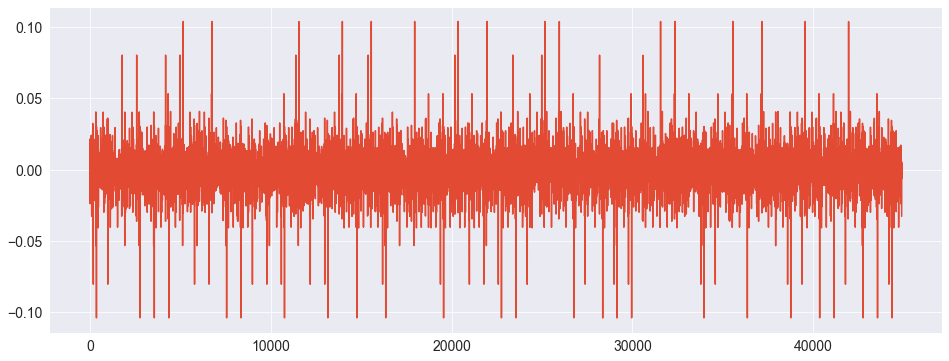

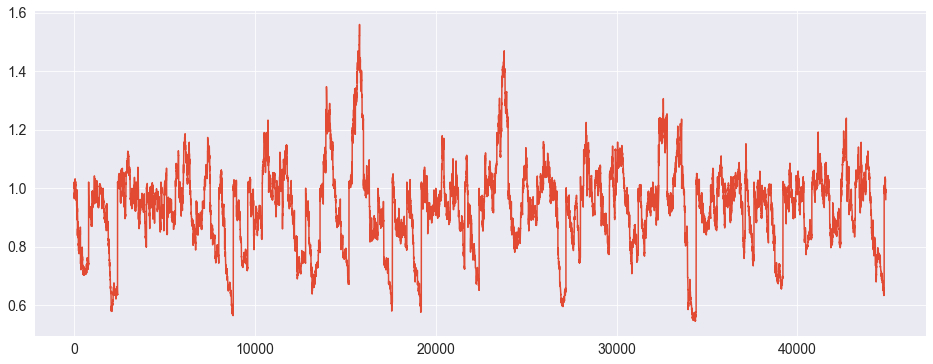

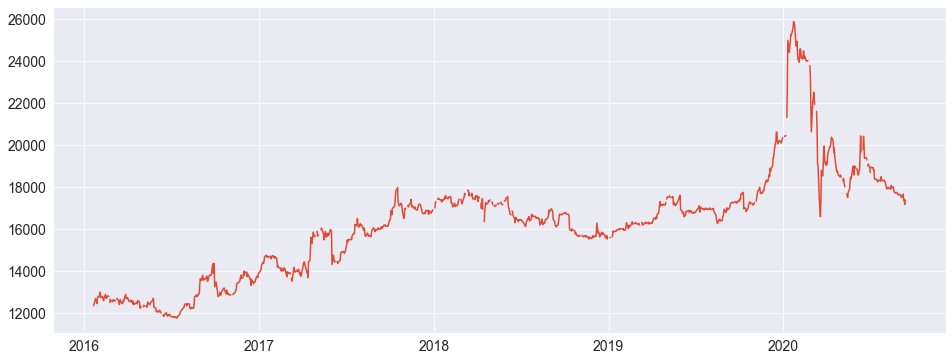

KeyboardInterrupt: 

In [465]:
from IPython.display import clear_output
state_size = dataRL.shape[1]
action_size = 3


EPISODES = 300
for e in range(300):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    print('episode:', e)
    for t in itertools.count():

        action = agent.get_action(state)

        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        navs.append(info['nav'])

        agent.append_sample(state, action, reward, next_state, done)
         # continue training as you go
        agent.train_model()
        score += reward
        rewards.append(reward)
        state = next_state
        
        
        if t % 30 == 0:
            clear_output(True)
            plt.plot(rewards)
            plt.show()
            plt.plot(navs)
            plt.show()
            plt.plot(prices[train_num + start_from:])
            plt.show()
        if done:

            agent.update_target_model()



            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon)

            if np.mean(scores[-min(10, len(scores)):]) > 1:
                sys.exit()
            break
    agent.model.save('cartpole_dqn.h5')

In [466]:
agent.epsilon

0.00999066636637756

In [121]:
navs = pd.Series(navs)

In [142]:
navs__ = navs[:-104]

In [308]:
h = agent.memory

In [461]:
FINAL_TEST = dataRL[-800:]

In [467]:
class DataHandler:
    def __init__(self, ticker, window, trading_period):
        self.window = window
        self.ticker = ticker
        self.data = self.get_data().dropna()
        self.step = 0
        self.offset = None
        self.trading_period = trading_period
    
    def process_data(self):
        #window = self.window
        #ticker = self.ticker
        
        #self.data = closing_price[ticker]
        #self.data = pd.concat([self.data, trading_volume[ticker]], axis = 1)
        self.data = FINAL_TEST#dataRL#price_return[ticker]#pd.concat([self.data, ], axis = 1)
        #self.data = pd.concat([self.data, rd(closing_price[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rd(trading_volume[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rf(closing_price[ticker], window)], axis = 1)
        #self.data = pd.concat([self.data, rf(trading_volume[ticker], window)], axis = 1)
        
        
        #self.closeness_centrality, self.degree_centrality = closeness_centrality, degree_centrality
        
        #sub_window = 20
        
        #self.closeness_centrality = self.closeness_centrality.rolling(window = sub_window).sum()
        #self.degree_centrality =  self.degree_centrality.rolling(window = sub_window).sum()
        
       #self.data = pd.concat([self.data, self.closeness_centrality], axis = 1)
        #self.data = pd.concat([self.data, self.degree_centrality], axis = 1)
        #self.data.columns = ['logret', 'rdClose', 'rdVol', 'rfClose', 'rfVol', 'closeness', 'degree'] #'close', 'volume',
        
        return self.data
    
    def get_data(self):
        self.data = self.process_data()
        
        return self.data
    
    def reset(self):
        """
        Provides starting index for time series and resets step
        
        """
        high = len(self.data.index) - self.trading_period ## HARD CODED
        self.offset = np.random.randint(low=0, high=1) #high
        self.step = 0
        print('Starting date:', str(self.data.index[0]))
        print('Starting state:',  self.data.iloc[self.offset + 0].values )
        print('Action space: <0(short), 1(hold), 2(long)>')

    def take_step(self, *args):
        """
        Returns data for current trading day and done signal
        
        """
        obs = self.data.iloc[self.offset + self.step].values
        #print('Current date:', str(self.data.iloc[self.offset + self.step].name))
        self.step += 1
        done = self.step > self.trading_period
        #if done == False:
            #print('End date:', self.data.index[self.offset + self.step])
        return obs, done

In [475]:
env_test = TradingEnvironment(trading_days = 424, ticker = ticker)

Starting date: 2017-09-06 07:00:00
Starting state: [ 4.99688735e-03  1.58453584e-02  2.21815030e-02  1.01886792e-01
  7.40740741e-03 -1.57112822e-17]
Action space: <0(short), 1(hold), 2(long)>


# Final test

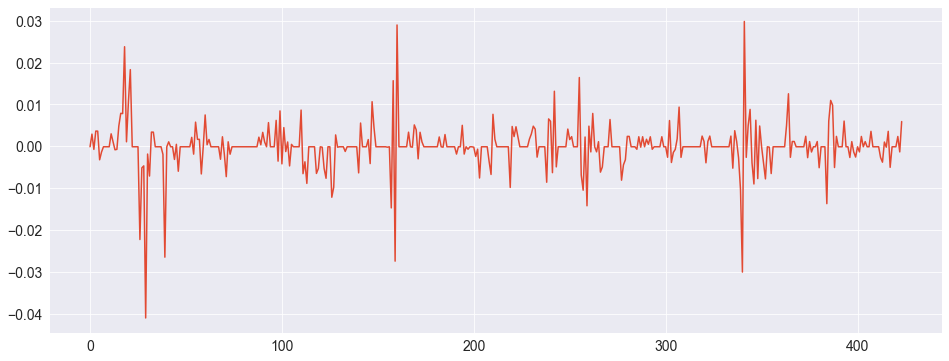

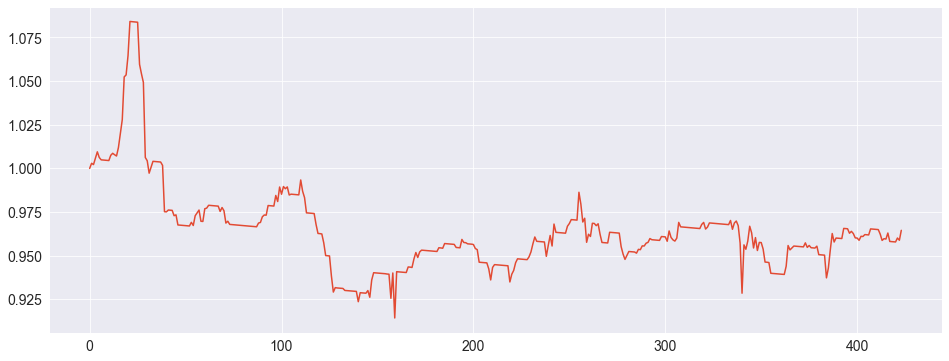

In [477]:
from IPython.display import clear_output
state_size = dataRL.shape[1]
action_size = 3

#agent = DQNAgent(state_size, action_size)
rewards_test = []
navs_test = []
scores_test, episodes_test = [], []
EPISODES = 300
for e in range(1):
    done = False
    score = 0
    state = env_test.reset()
    state = np.reshape(state, [1, state_size])
    print('episode:', e)
    for t in itertools.count():

        # get action for the current state and go one step in environment
        action = agent.get_action(state)
        #action = #agent.get_action(state)
        next_state, reward, done, info = env_test.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        navs_test.append(info['nav'])
 

        agent.append_sample(state, action, reward, next_state, done)
        # continue training as you go
        agent.train_model()
        score+= reward
        rewards_test.append(reward)
        state = next_state
        
        
        clear_output(True)
        plt.plot(rewards_test)
        plt.show()
        plt.plot(navs_test)
        plt.show()
        if done:
            break
    # save the model

In [502]:
test_navs.to_csv('FINAL_NAVS.txt')

In [481]:
test_navs = pd.Series(navs_test)

In [483]:
test_rets = np.log(test_navs/test_navs.shift(1)).fillna(0)

In [9]:
import pandas as pd
import numpy as np

In [3]:
test_navs = pd.read_csv('FINAL_NAVS.txt')

In [10]:
test_rets = np.log(test_navs['0']/test_navs['0'].shift(1)).fillna(0)

# Генерим метрики по последней симуляции

In [1160]:
import quantstats as qs ## ЗАПУСКАТЬ В САМОМ КОНЦЕ. ВОЗМОЖНО ЛОМАЕТ XGBOOST

In [1191]:
rews = pd.Series(rewards_test)
rews.index = prices[train_num + start_from +2 :].index

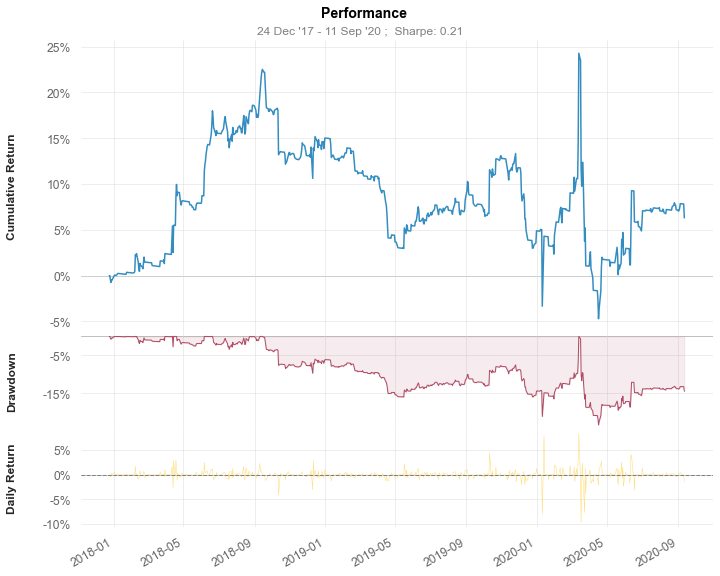

In [1192]:
qs.plots.snapshot(rews, title='Performance')